In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
for col in data.columns:
    print(" col name: ", col , "unique precentage ", len(data[col].unique())/len(data))

 col name:  RowNumber unique precentage  1.0
 col name:  CustomerId unique precentage  1.0
 col name:  Surname unique precentage  0.2932
 col name:  CreditScore unique precentage  0.046
 col name:  Geography unique precentage  0.0003
 col name:  Gender unique precentage  0.0002
 col name:  Age unique precentage  0.007
 col name:  Tenure unique precentage  0.0011
 col name:  Balance unique precentage  0.6382
 col name:  NumOfProducts unique precentage  0.0004
 col name:  HasCrCard unique precentage  0.0002
 col name:  IsActiveMember unique precentage  0.0002
 col name:  EstimatedSalary unique precentage  0.9999
 col name:  Exited unique precentage  0.0002


In [5]:
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
d_types = dict(data.dtypes)
d_types

{'CreditScore': dtype('int64'),
 'Geography': dtype('O'),
 'Gender': dtype('O'),
 'Age': dtype('int64'),
 'Tenure': dtype('int64'),
 'Balance': dtype('float64'),
 'NumOfProducts': dtype('int64'),
 'HasCrCard': dtype('int64'),
 'IsActiveMember': dtype('int64'),
 'EstimatedSalary': dtype('float64'),
 'Exited': dtype('int64')}

In [7]:
for name,type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])        

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
onehotencoder = OneHotEncoder()
encodings = onehotencoder.fit_transform(data['Geography'].values.reshape(-1,1)).toarray()
values = data['Geography'].unique()

for val in values:
    data['Geography' + str(val)] = encodings[:,val]
data = data.drop(['Geography'],axis=1)

In [10]:
rem_col = list(data.columns)
rem_col.remove('Exited')

In [11]:
X =  data[rem_col].values
Y = data['Exited'].values.astype(np.uint8)

In [12]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=.2,random_state=4)

In [13]:
Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [14]:
model = LogisticRegression()
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

0.8215

In [15]:
model.coef_

array([[-0.03444651, -0.25435422,  0.75093096, -0.05445845,  0.20181171,
        -0.06473687, -0.04270295, -0.53682421,  0.03456902, -0.11088871,
        -0.08503169,  0.21209781]])

In [16]:
model.intercept_

array([-1.63966082])

In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [18]:
sigmoid(model.coef_.dot(Xtest[10,:])+model.intercept_)

array([0.09872623])

In [19]:
np.round(sigmoid(model.coef_.dot(Xtest[10,:])+model.intercept_))

array([0.])

In [20]:
model.predict(Xtest[10,:].reshape(1,-1))

array([0], dtype=uint8)

In [21]:
rfecv = RFECV(model,step=1,min_features_to_select=6,n_jobs=-1)
rfecv.fit(Xtrain,Ytrain)

RFECV(estimator=LogisticRegression(), min_features_to_select=6, n_jobs=-1)

In [22]:
rfecv.support_

array([False,  True,  True, False,  True, False, False,  True, False,
        True, False,  True])

In [23]:
rfecv.ranking_

array([7, 1, 1, 4, 1, 3, 5, 1, 6, 1, 2, 1])

In [24]:
selected_features = np.where(rfecv.support_)[0]
Xtrain = Xtrain[:,selected_features]
Xtest = Xtest[:,selected_features]

In [25]:
model.fit(Xtrain,Ytrain)

LogisticRegression()

In [26]:
model.score(Xtest,Ytest)

0.824

In [29]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [30]:
model = LogisticRegression()
rfecv = RFECV(model,step=1,min_features_to_select=4,n_jobs=-1)
rfecv.fit(X,Y)

RFECV(estimator=LogisticRegression(), min_features_to_select=4, n_jobs=-1)

In [31]:
kfold = KFold(n_splits=5)
test_scores = []

for train_idx,test_idx in kfold.split(X):
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[test_idx]
    Ytest = Y[test_idx]
    
    model = LogisticRegression()
    model.fit(Xtrain,Ytrain)
    
    test_scores.append(model.score(Xtest,Ytest))
    

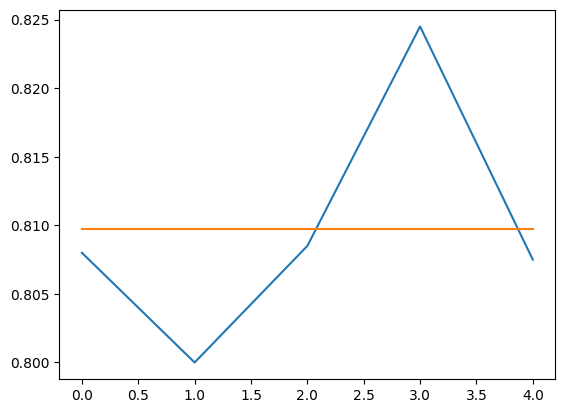

In [32]:
plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))
plt.show()


In [34]:
np.mean(test_scores)

0.8097